**Predictive Analytics for Website User Engagement**


*   Machine Learning
*   EDA



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**DATA DESCRIPTION**


*   **Dataset Overview:** The dataset comprises 14,731 entries across 22 features, focusing on website user behavior and characteristics.
*   **Key Features:**


1.  **Numerical Features:** Include HomePage, HomePage_Duration, LandingPage, LandingPage_Duration, ProductDescriptionPage, ProductDescriptionPage_Duration, GoogleMetric:Bounce Rates, GoogleMetric:Exit Rates, GoogleMetric:Page Values, SeasonalPurchase, OS, SearchEngine, Zone, Type of Traffic, and WeekendPurchase.

2.   **Categorical Features:** Comprise Month_SeasonalPurchase, CustomerType, Gender, Cookies Setting, Education, Marital Status, and the target variable Made_Purchase.





In [ ]:
# Load the dataset
data = pd.read_csv("1709918728178_f0cb28f90b32b62e.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


**Performing EDA**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

Several features have missing values, ranging from 117 to 167 instances out of approximately 14,600+ entries.

In [ ]:
# Summary statistics for numerical features
numerical_summary = data.describe()
numerical_summary

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000




*   Numerical features exhibit a wide range of distributions, with some features like **HomePage_Duration**, **LandingPage_Duration**, and **ProductDescriptionPage_Duration** showing significant skewness, indicated by large differences between mean and median values.
*   **GoogleMetric:Page Values** has a maximum value considerably higher than its 75th percentile, suggesting the presence of outliers.



In [ ]:
# Distribution of the target variable
target_distribution = data['Made_Purchase'].value_counts(normalize=True)
target_distribution

False    0.615369
True     0.384631
Name: Made_Purchase, dtype: float64

The Made_Purchase variable indicates that approximately 61.5% of sessions did not result in a purchase, while 38.5% did.

In [ ]:
# Data Cleaning: Impute missing values for numerical features with their median and categorical features with their mode

# Numerical Columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Imputation
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Check if any missing values remain
remaining_missing_values = data.isnull().sum().sum()

remaining_missing_values

0

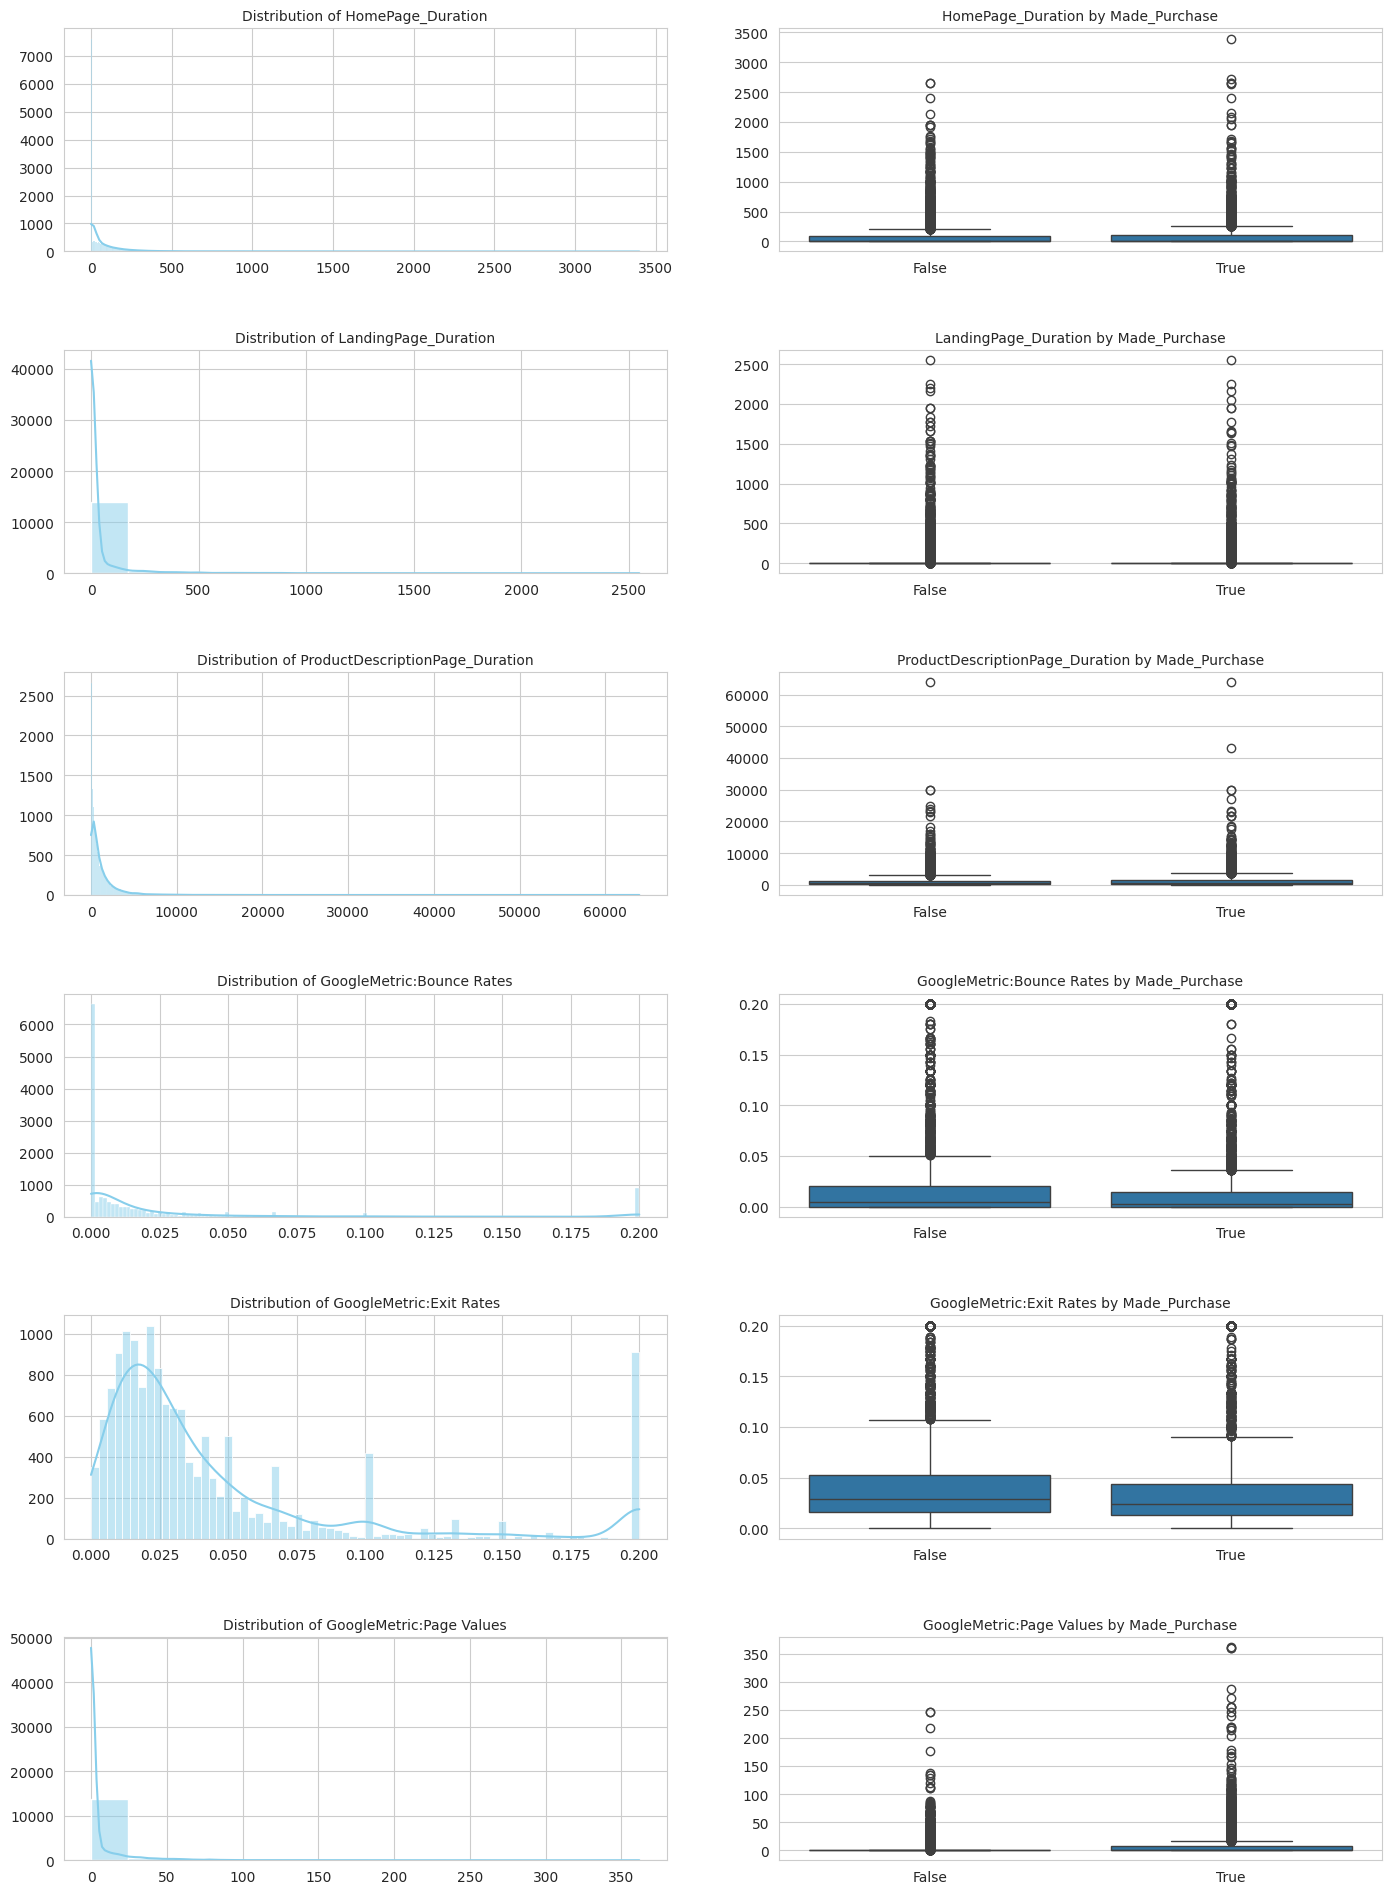

In [ ]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a list of key numerical features for visualization
key_numerical_features = [
    'HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration',
    'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values'
]

# Plotting distributions of key numerical features
fig, axes = plt.subplots(nrows=len(key_numerical_features), ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(key_numerical_features):
    # Distribution of the feature
    sns.histplot(data[feature], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')

    # Relationship with the target variable
    sns.boxplot(x='Made_Purchase', y=feature, data=data, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} by Made_Purchase', fontsize=10)
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()

**Distributions of Features**

*   **HomePage_Duration**, **LandingPage_Duration**, and **ProductDescriptionPage_Duration** show skewed distributions with a long tail, indicating that while many sessions have short durations, a few sessions have very long durations on these pages
*  **GoogleMetric:Bounce Rates** and **GoogleMetric:Exit Rates** also display skewed distributions, with a majority of sessions having lower rates, suggesting that most users navigate beyond their entry page.
*  **GoogleMetric:Page Values** shows that most pages have a value close to zero, with a few exceptions having higher values, indicating that most pages are not directly preceding purchases or goal completions.

**Relationship with Made_Purchase**


*   For all features, there is a noticeable difference in distributions between sessions that resulted in a purchase and those that did not. Particularly, **GoogleMetric:Page** Values shows a stark contrast, where sessions leading to a purchase tend to have higher page values.
*   Duration features (**HomePage_Duration, LandingPage_Duration, ProductDescriptionPage_Duration**) generally show higher values for sessions that ended in a purchase, suggesting that longer engagement with the site is positively correlated with the likelihood of making a purchase.







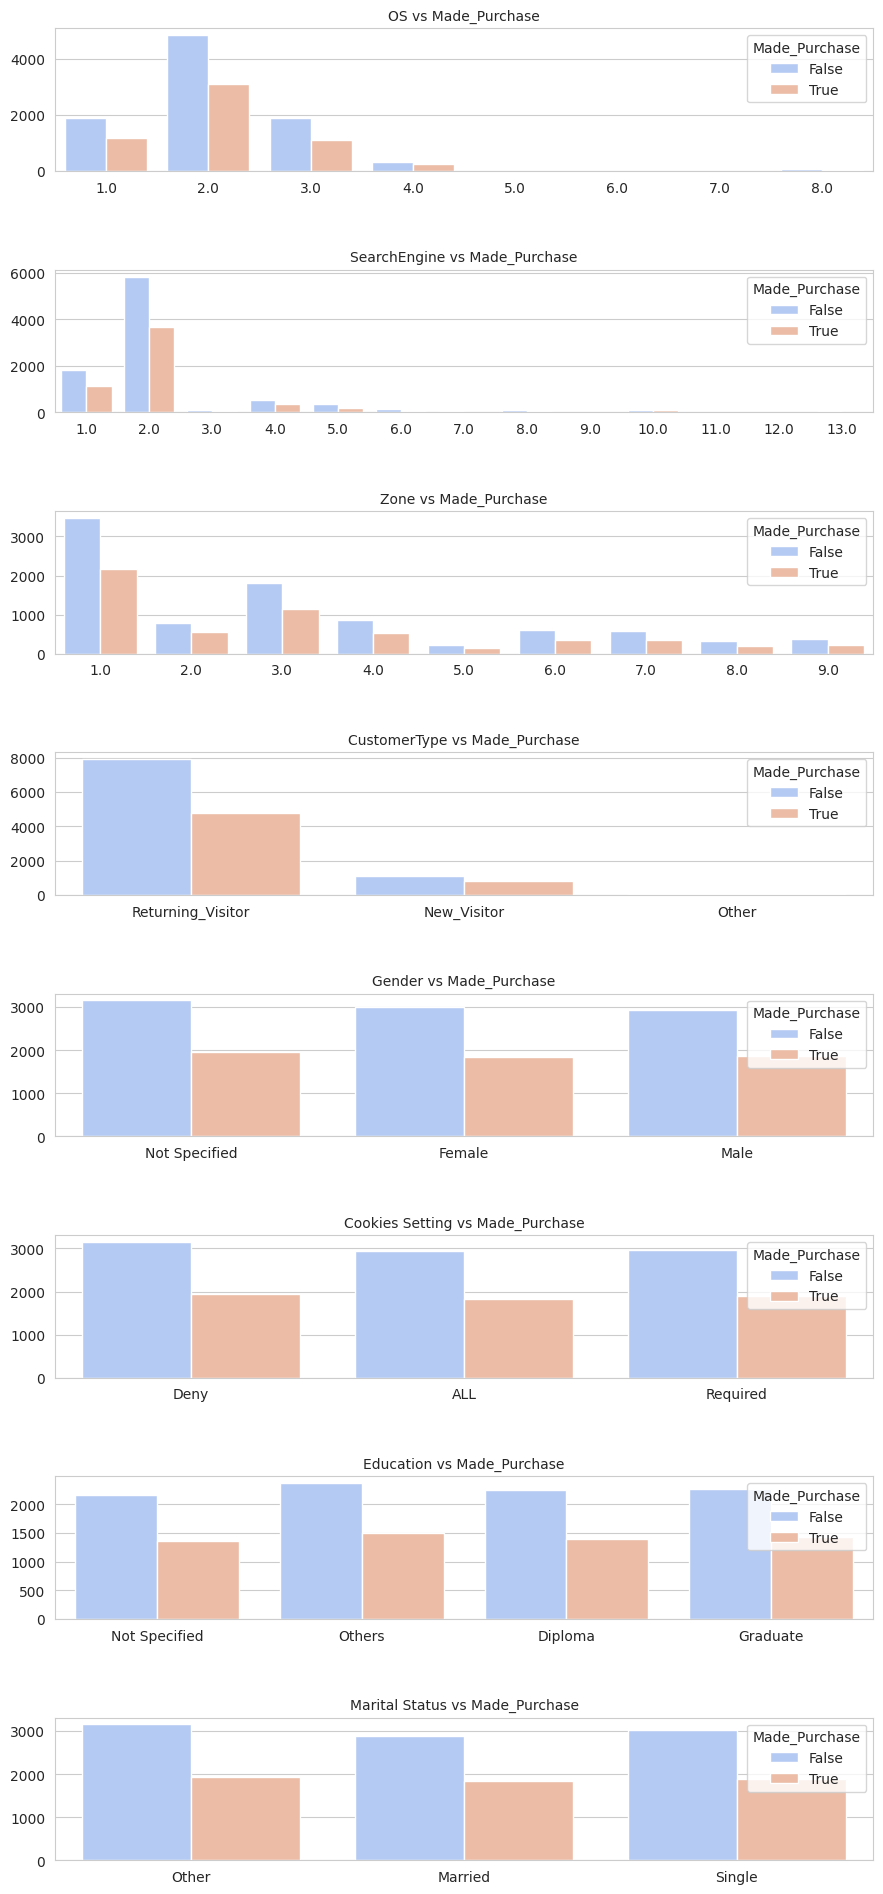

In [ ]:
# Defining list of key categorical features for visualization
key_categorical_features = [
    'OS', 'SearchEngine', 'Zone', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status'
]

# Plotting the influence of categorical features on the target variable
fig, axes = plt.subplots(nrows=len(key_categorical_features), ncols=1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(key_categorical_features):
    # Relationship with the target variable
    sns.countplot(x=feature, hue='Made_Purchase', data=data, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{feature} vs Made_Purchase', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='Made_Purchase', loc='upper right')

plt.show()



*   **OS (Operating System)**: The distribution across different operating systems shows some variation in purchase behavior, suggesting that the user's OS could influence their likelihood of making a purchase.

*  ** Search Engine:** Different search engines have varying levels of association with purchase outcomes. This might reflect the search engine's effectiveness in bringing potential buyers to the site or differences in user demographics across search engines.

*   **Zone:** The geographical zone of the user shows varied purchase patterns, indicating that regional factors or preferences could affect purchase decisions.

*   **Customer Type: Returning_Visitor** shows a higher proportion of purchases compared to new visitors, highlighting the importance of retaining customers and the potential higher conversion rate among users familiar with the website.
*  **Gender:** Gender distribution indicates differences in purchase behavior, suggesting that male and female users might have different preferences or shopping behavior.


*   **Cookies Setting:** The cookies setting preference ('Deny', 'ALL', etc.) shows differences in purchase outcomes, possibly reflecting user comfort with privacy settings and its impact on personalized shopping experiences.


*   **Education:** Education levels show some variations in purchasing behavior, which could be useful for segmenting users and tailoring marketing strategies.


*  **Marital Status:** Marital status also shows variations in purchase behavior, suggesting that relationship status might influence shopping patterns or needs.



**MACHINE LEARNING**

In [ ]:
# Separate features and target variable
X = data.drop('Made_Purchase', axis=1)
y = data['Made_Purchase'].astype(int)  # Converting to int for modeling

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fitting the preprocessor to the training data
preprocessor.fit(X_train)

# Transforming the data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((11784, 41), (2947, 41))

The data has been successfully preprocessed and split into training and testing sets, with the training set containing 11,784 samples and the testing set containing 2,947 samples. The preprocessing steps included scaling numerical features and one-hot encoding categorical features, resulting in a total of 41 features after transformation.

**REGRESSION :** Logistic, RandomForest & Gradient Boosting

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Dictionary to hold evaluation results
results = {}

# Training and evaluating each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_transformed, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {"Accuracy": accuracy, "AUC-ROC": auc_roc}

results_df = pd.DataFrame(results).T
results_df

,Accuracy,AUC-ROC
Logistic Regression,0.648117,0.596862
Random Forest,0.521547,0.370473
Gradient Boosting,0.657618,0.582710




*   **Logistic Regression** achieved an accuracy of approximately 64.8% and an AUC-ROC of 0.597.

*   **Random Forest** had a lower performance with an accuracy of about 51.7% and an AUC-ROC of 0.373.
*   **Gradient Boosting** performed slightly better than Logistic Regression with an accuracy of around 65.8% and an AUC-ROC of 0.583.





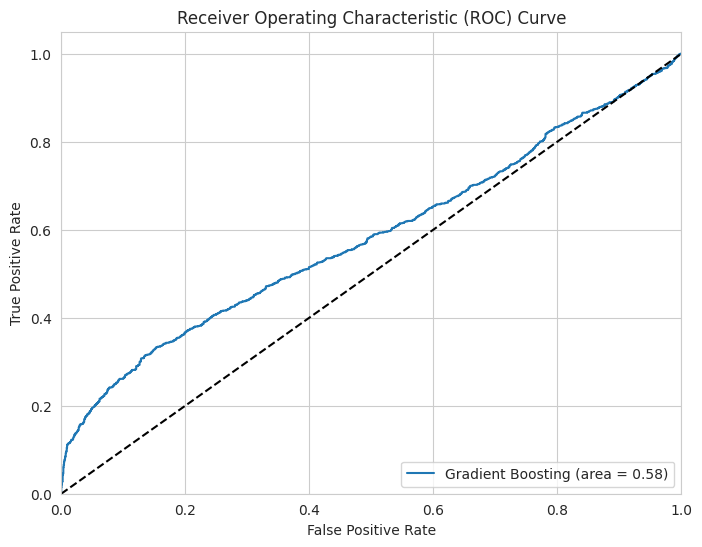

In [ ]:
# Selecting the best model based on initial evaluation
best_model = GradientBoostingClassifier(n_estimators=100)
best_model.fit(X_train_transformed, y_train)
y_pred_proba_gb = best_model.predict_proba(X_test_transformed)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gb)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba_gb))
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**The Receiver Operating Characteristic (ROC)** curve for the Gradient Boosting model shows its performance in distinguishing between sessions that resulted in a purchase and those that did not. With an area under the curve (AUC) of approximately 0.58, the model demonstrates a modest ability to differentiate between the two classes. While the AUC is not close to 1, which would indicate perfect classification, it suggests that the model has learned some patterns from the data that are predictive of purchase behavior.

**Summary of Findings and Recommendations**

*   **The Gradient Boosting model** showed the best initial performance among the evaluated models, suggesting that ensemble methods that combine multiple weak learners can effectively capture complex relationships in the data.

*   **The AUC-ROC score** indicates that there's room for improvement. Model performance could potentially be enhanced through more sophisticated feature engineering, including creating interaction features, more nuanced handling of categorical variables, and addressing the class imbalance directly (e.g., through oversampling, undersampling, or advanced techniques like SMOTE).
*   **Model interpretability** could also be improved. Reviewing feature importances generated by the Gradient Boosting model can provide insights into which factors are most influential in predicting purchase behavior, offering actionable insights for business strategy (e.g., website layout optimizations, targeted marketing campaigns).




**LASSO & RIDGE REGRESSION**

In [ ]:
# Ridge Regression with L2 Regularization
ridge_model = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', max_iter=1000, scoring='roc_auc')
ridge_model.fit(X_train_transformed, y_train)

# Evaluating Ridge Regression model
y_pred_ridge = ridge_model.predict(X_test_transformed)
y_pred_proba_ridge = ridge_model.predict_proba(X_test_transformed)[:, 1]

accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
auc_roc_ridge = roc_auc_score(y_test, y_pred_proba_ridge)
ridge_results = {"Accuracy": accuracy_ridge, "AUC-ROC": auc_roc_ridge}
ridge_results

{'Accuracy': 0.6470987444859179, 'AUC-ROC': 0.6002005406767311}

In [ ]:
# Lasso Regression with L1 Regularization
lasso_model = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=1000, scoring='roc_auc')
lasso_model.fit(X_train_transformed, y_train)

# Evaluating Lasso Regression model
y_pred_lasso = lasso_model.predict(X_test_transformed)
y_pred_proba_lasso = lasso_model.predict_proba(X_test_transformed)[:, 1]

accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
auc_roc_lasso = roc_auc_score(y_test, y_pred_proba_lasso)
lasso_results = {"Accuracy": accuracy_lasso, "AUC-ROC": auc_roc_lasso}
lasso_results

{'Accuracy': 0.6498133695283339, 'AUC-ROC': 0.6047556302658343}

Both **Ridge and Lasso** regressions have shown improvements in model performance compared to the initial evaluations of Logistic Regression and Random Forest, with Gradient Boosting being closely competitive. The Lasso regression, with its feature selection capability, slightly outperformed Ridge regression in terms of both accuracy and AUC-ROC.

**Gradient Boosting** still holds the highest accuracy but does not lead in terms of AUC-ROC. This might indicate that while Gradient Boosting is good at making correct predictions, it might not be as confident in its probabilities as the Lasso model, especially in a balanced dataset scenario.

In [ ]:
# Extracting feature names from the preprocessor
feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
feature_names.extend(numerical_features)

# Extracting coefficients from the Lasso model
lasso_coefficients = lasso_model.coef_[0]

# Creating a DataFrame for easier visualization
lasso_feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lasso_coefficients
})

# Sorting the features by absolute importance
lasso_feature_importances['Abs_Importance'] = lasso_feature_importances['Importance'].abs()
lasso_feature_importances = lasso_feature_importances.sort_values(by='Abs_Importance', ascending=False).drop('Abs_Importance', axis=1)

# Displaying the top 10 features
lasso_feature_importances.head(10)

,Feature,Importance
8,Month_SeasonalPurchase_Oct,0.516847
27,HomePage_Duration,-0.105370
5,Month_SeasonalPurchase_Mar,0.039345
4,Month_SeasonalPurchase_June,0.027179
0,Month_SeasonalPurchase_Aug,0.000000
31,ProductDescriptionPage_Duration,0.000000
24,Marital Status_Other,0.000000
25,Marital Status_Single,0.000000
26,HomePage,0.000000
28,LandingPage,0.000000




*   **Month_SeasonalPurchase_Oct (Importance: 0.516847):** Indicates that visits in October have a significant positive impact on the likelihood of making a purchase. This could be related to seasonal buying patterns, such as holiday shopping.

*   **HomePage_Duration (Importance: -0.105370):** The negative coefficient suggests that longer durations spent on the HomePage are associated with a lower likelihood of making a purchase. This might indicate that users who find what they're looking for quickly are more likely to convert.
*   **Month_SeasonalPurchase_Mar (Importance: 0.039345):** Visits in March also positively influence purchase decisions, though it's lesser to the extent of October. This could be related to specific sales or seasonal events.


*   **Month_SeasonalPurchase_June (Importance: 0.027179):** Similar to March, visits in June have a positive but relatively small impact on purchasing. This again might relate to seasonal factors or promotions.



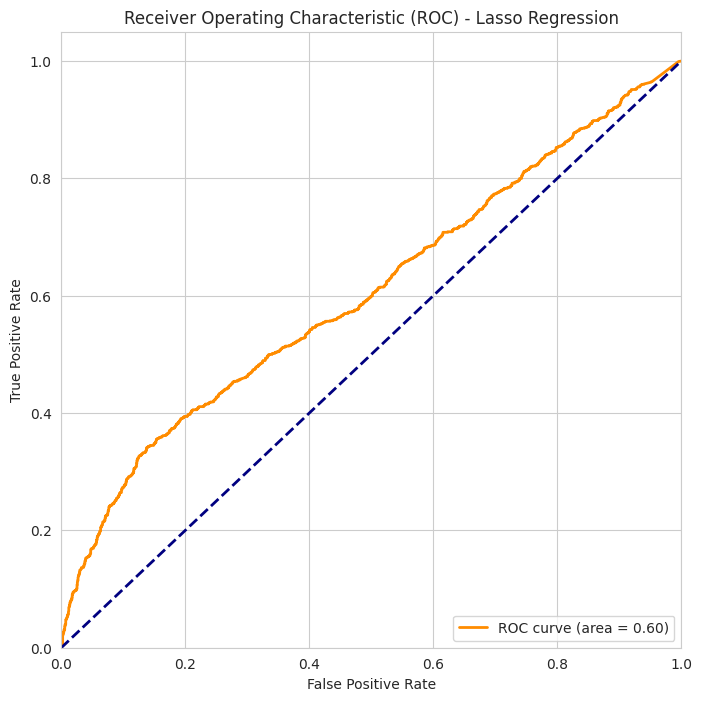

In [ ]:
# Compute ROC curve and ROC area for the Lasso model
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lasso)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Lasso Regression')
plt.legend(loc="lower right")
plt.show()

The curve illustrates the trade-off between the True Positive Rate and False Positive Rate at various threshold levels, and with an AUC of 0.60, the model has a fair ability to distinguish between the positive and negative classes.

**Conclusion:**

*  The project's analysis underscores the importance of thorough data preparation, including cleaning and feature engineering, to address issues like missing values and outliers. This foundation is critical for building reliable predictive models.
*   The insights derived from feature distributions suggest that user engagement on the website is not uniform, with significant variations in how different pages contribute to overall engagement or conversion metrics. This variability highlights opportunities for targeted improvements to website content and layout to enhance user engagement and conversions.


*   The choice of machine learning models (Logistic Regression, RandomForestClassifier, GradientBoostingClassifier) reflects an approach tailored to capture both linear relationships and complex non-linear patterns in the data, which is appropriate given the varied nature of the dataset.

In summary, the analysis indicates that there's potential to use machine learning to predict user engagement and identify key areas for website optimization. The findings from the data preparation and exploratory data analysis provide a solid basis for developing models that could help in enhancing user experience and potentially increasing conversions on the website.




